In [40]:
# Import libraries
from clusteval import clusteval
from df2onehot import df2onehot
from sklearn.preprocessing import MinMaxScaler

# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality reduction
from sklearn.manifold import TSNE

In [41]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [42]:
# Import data
df = pd.read_csv('HR_DS.csv')

In [43]:
# Check for missing values in each column
missing_values = df.isna()
missing_values_count = missing_values.sum()

if missing_values_count.sum() > 0:
    print("Missing Values per Column:", missing_values_count)
else:
    print('There are no missing values in the dataset!')

There are no missing values in the dataset!


In [44]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [45]:
df_cat = df.select_dtypes('object')
df_cat.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [46]:
df = df.drop(['Over18'],axis=1)

In [47]:
df_num = df.select_dtypes('int64')
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [48]:
df = df.drop(['EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [49]:
df_copy = df.copy()
df_copy.select_dtypes('object').describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [50]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

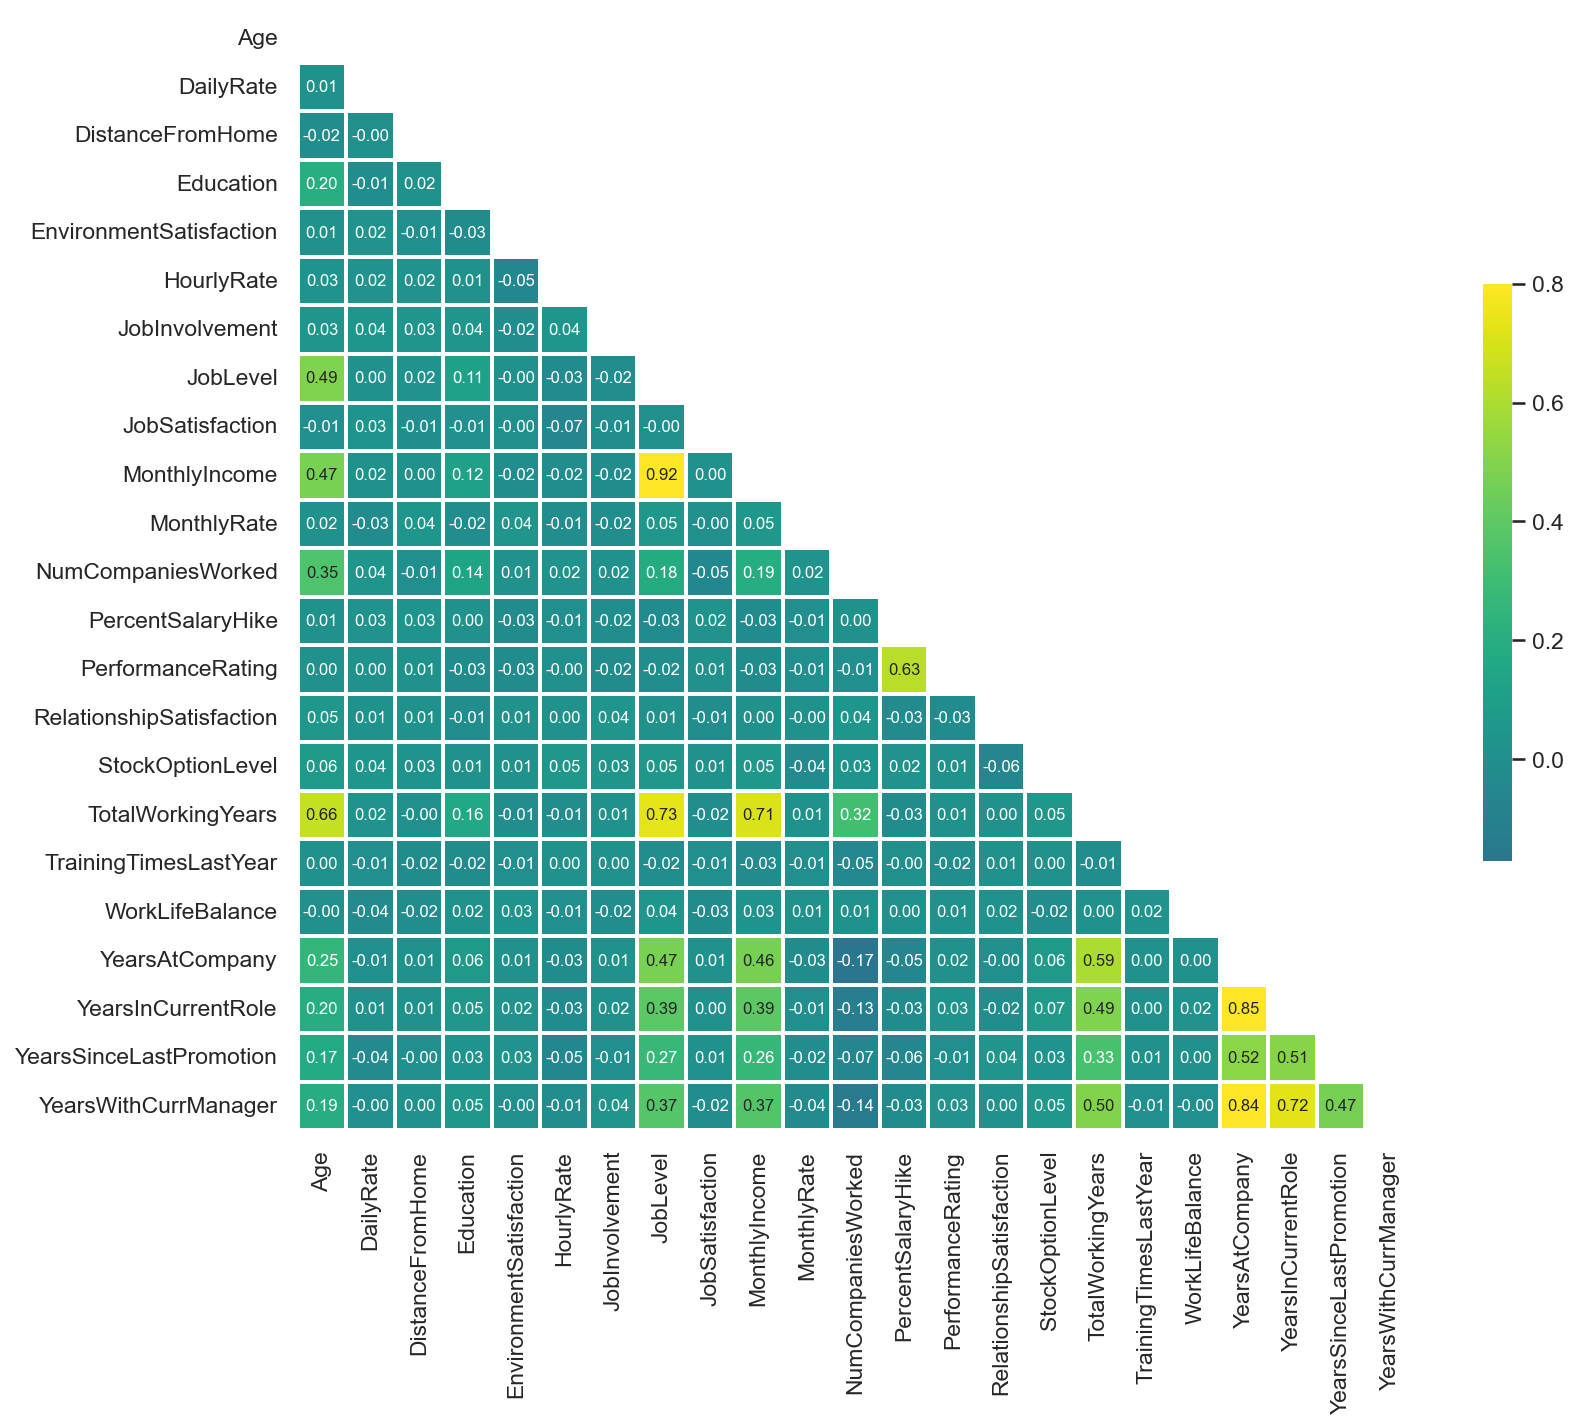

In [51]:
corr = df.select_dtypes('int64').corr(method='spearman')

sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 150)
heatmap = sns.heatmap(corr, mask = mask, cmap= "viridis", vmax=.8, center=0,
             square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot = True, annot_kws={'size': 8},fmt = ".2f")

In [52]:
df_copy = df_copy.drop(['MonthlyIncome' ,'YearsInCurrentRole', 'YearsWithCurrManager'],axis=1)

In [53]:
df_copy.select_dtypes('object').describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673


In [54]:
cat = df_copy.select_dtypes('object')

In [55]:
# Encoding all categorical features
for col in cat.columns:
   n = 2
   for i in cat[col].unique():
      df_copy[col] = df_copy[col].replace(i,n)
      n += 1

In [57]:
#normalizing 
scaler = MinMaxScaler(feature_range = (0,1))
norm = scaler.fit_transform(df_copy)
df_norm= pd.DataFrame(norm,columns=df_copy.columns)

In [58]:
# Initialize clusteval
ce = clusteval()

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[complete]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 28/28 [00:00<00:00, 29.42it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [4].
[clusteval] >INFO> Fin.


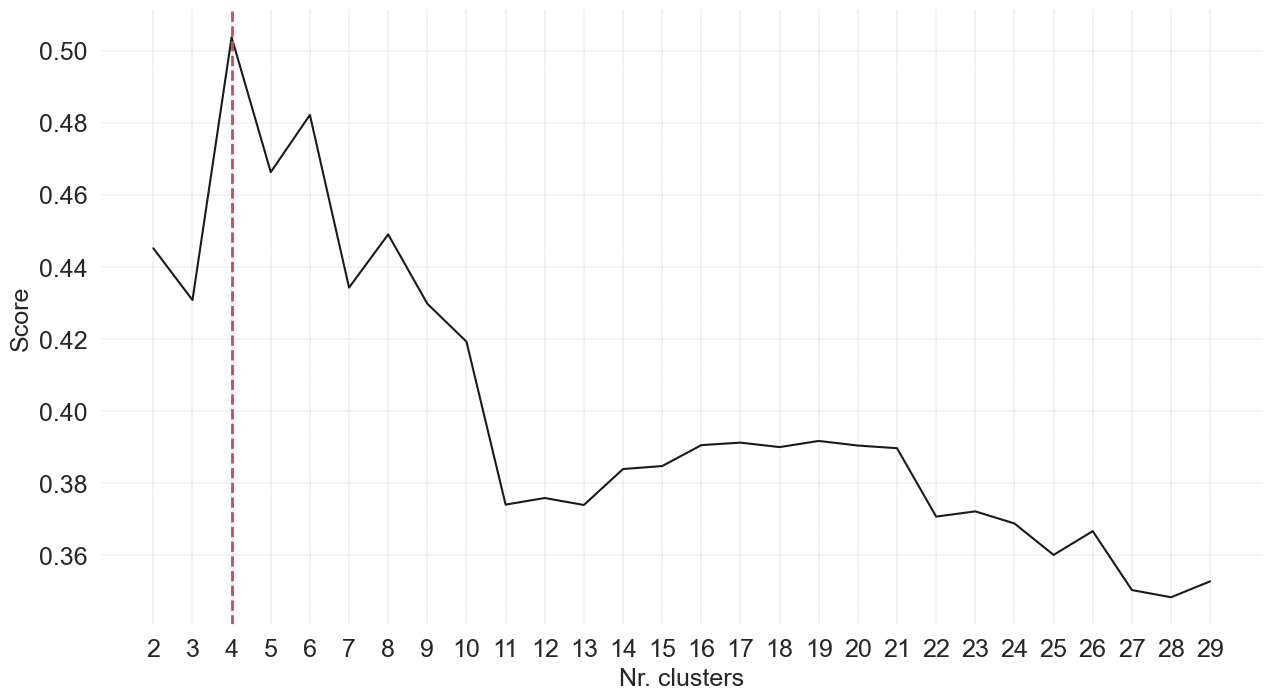

[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Estimated number of n_clusters: 4, average silhouette_score=0.504


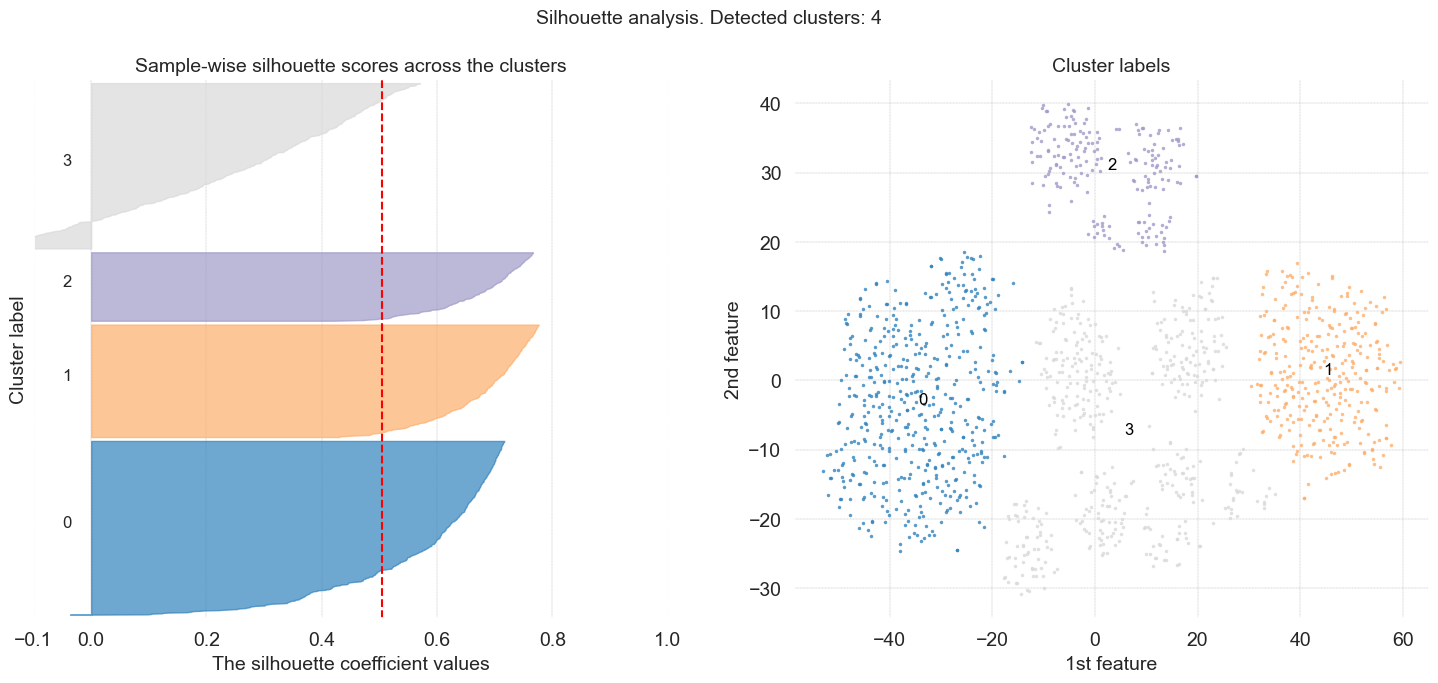

(<Figure size 1800x700 with 2 Axes>,
 <Axes: title={'center': 'Sample-wise silhouette scores across the clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <Axes: title={'center': 'Cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [59]:
# Initialize library
xycoord = TSNE(n_components=2, init='random', perplexity=30).fit_transform(df_norm.values)

# Initialize clusteval
ce = clusteval(cluster='agglomerative', metric='euclidean', linkage='complete', min_clust=1, max_clust=30)

# Clustering and evaluation
results = ce.fit(xycoord)

# Make plots
ce.plot()

ce.plot_silhouette()

In [75]:
df.replace({'No':0,'Yes':1,},inplace=True)

In [77]:
df_clusters = df.copy()

In [78]:
df_clusters['clusters']=results['labx']

In [79]:
cluster_0 = df_clusters[df_clusters['clusters'] == 0]
cluster_1 = df_clusters[df_clusters['clusters'] == 1]
cluster_2 = df_clusters[df_clusters['clusters'] == 2]
cluster_3 = df_clusters[df_clusters['clusters'] == 3]

In [81]:
# check the percentage of attrition in each cluster

my_dict = dict()

for i in range(df_clusters['clusters'].max()+1):
    cluster = df_clusters[df_clusters['clusters']==i]
    prob = round(100*cluster[cluster['Attrition']==1].shape[0]/cluster.shape[0],2)
    print(f'Cluster {i} has a probability of attrition of: {prob}%')

Cluster 0 has a probability of attrition of: 0.61%
Cluster 1 has a probability of attrition of: 1.57%
Cluster 2 has a probability of attrition of: 3.61%
Cluster 3 has a probability of attrition of: 47.54%


Analysing Cluster 3

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


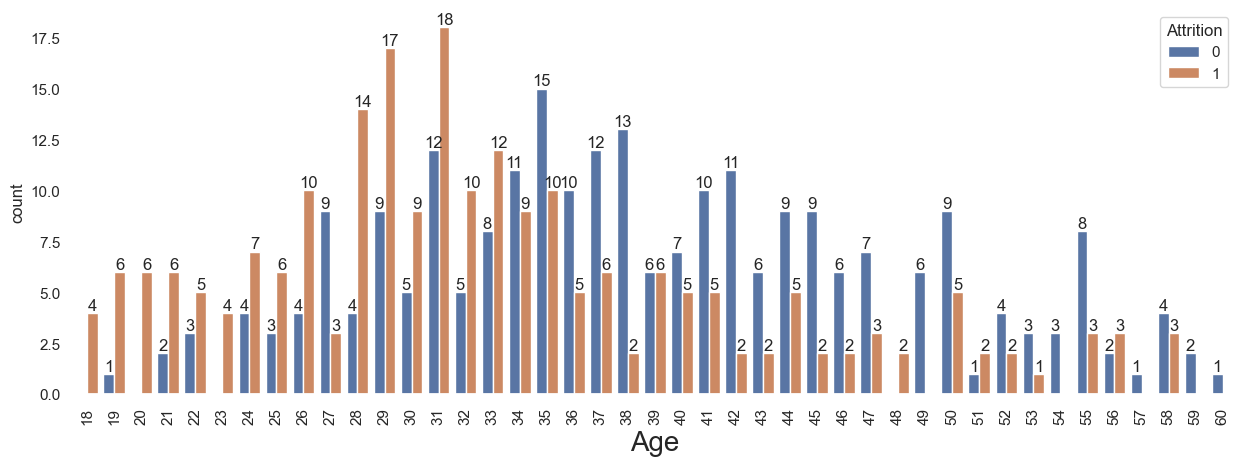

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


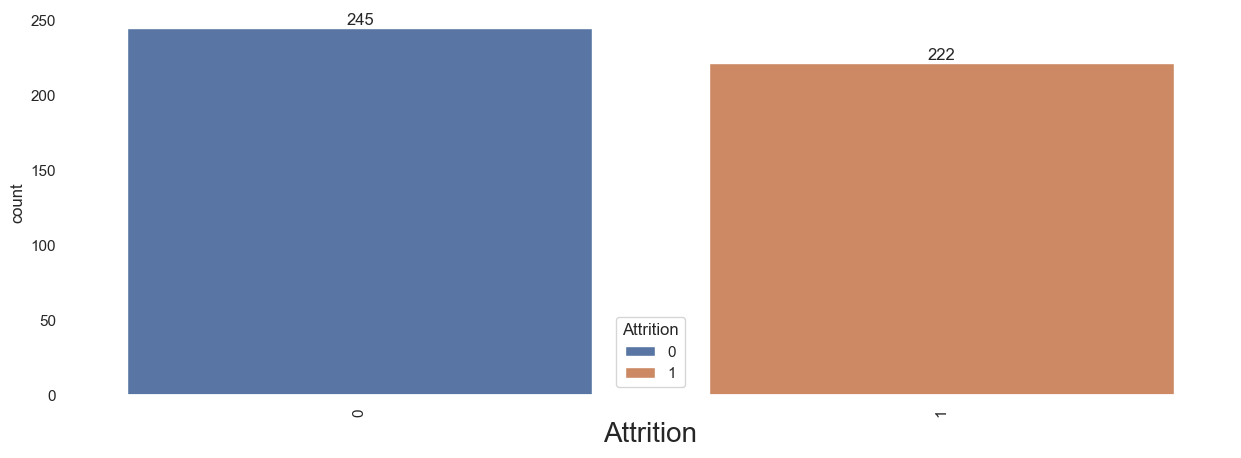

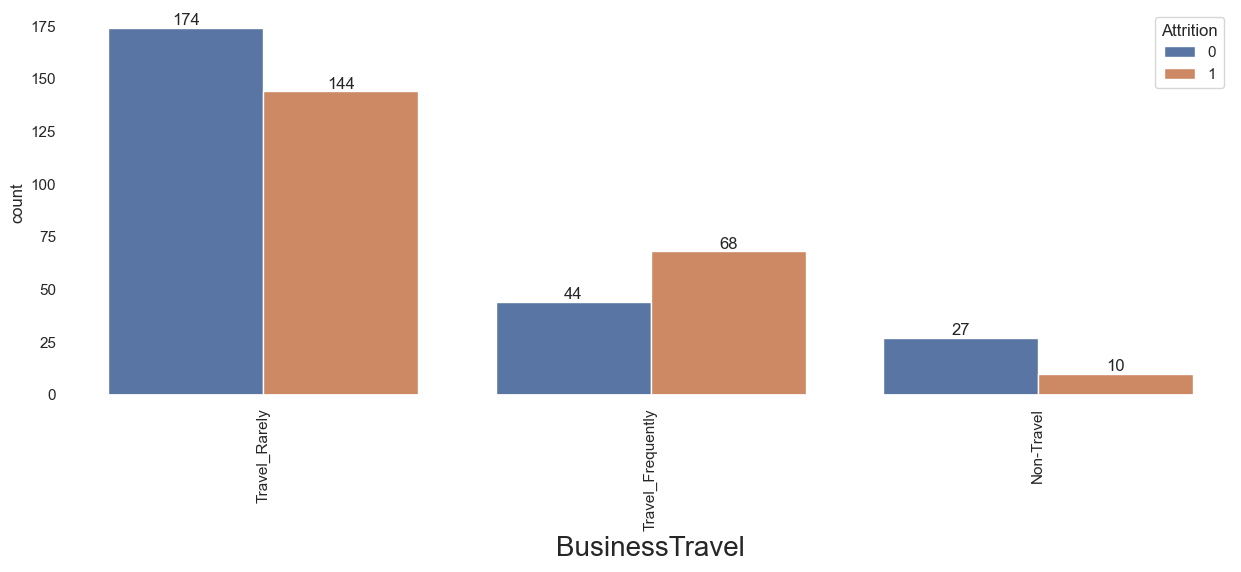

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


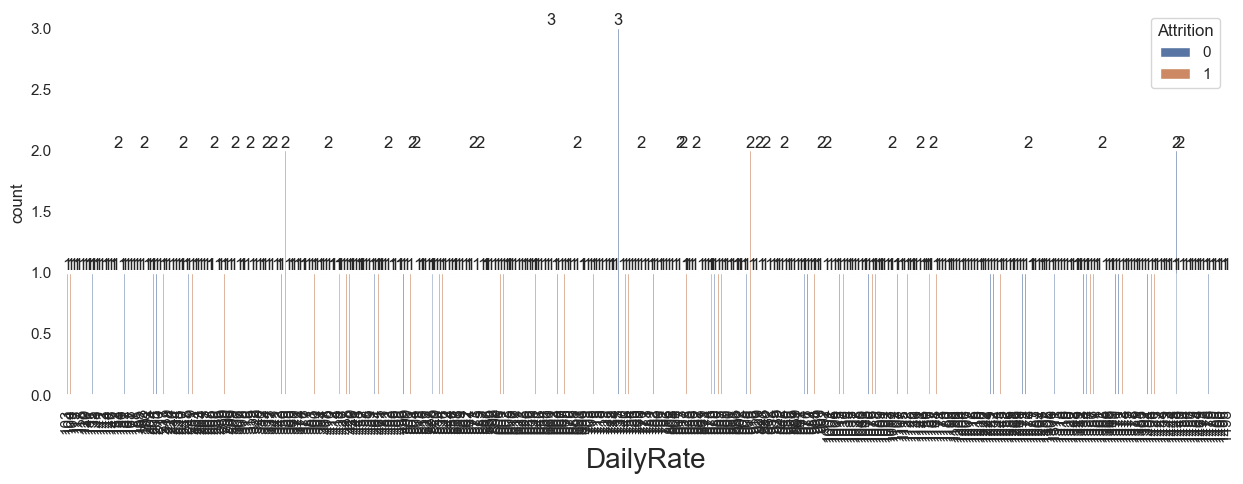

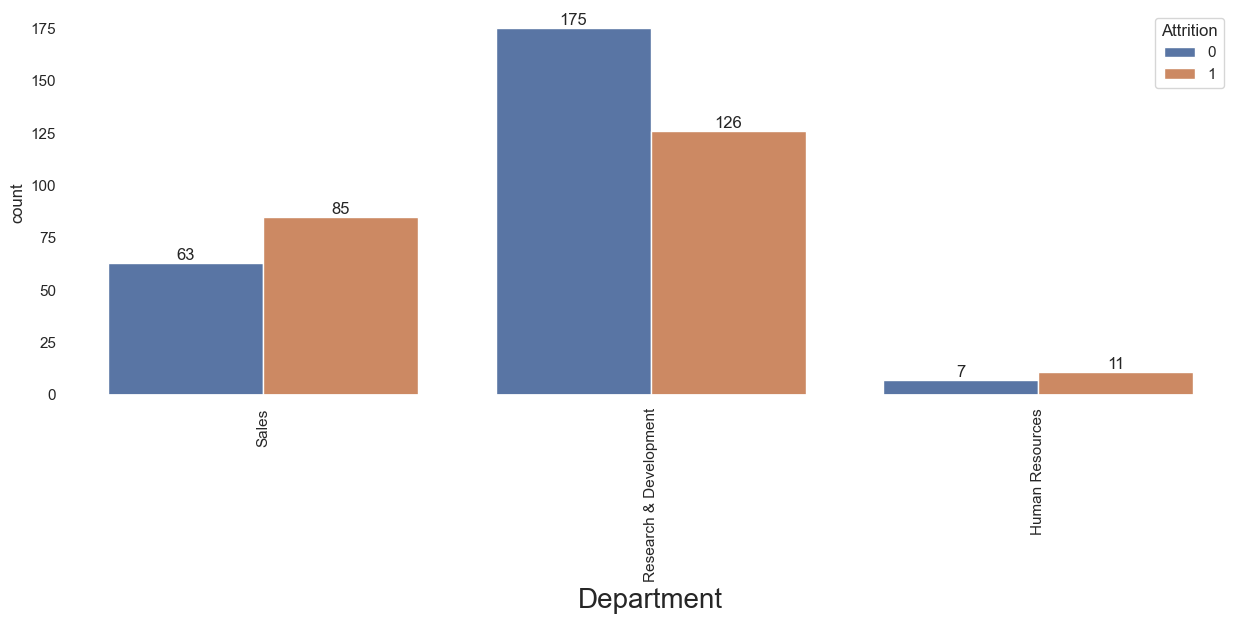

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


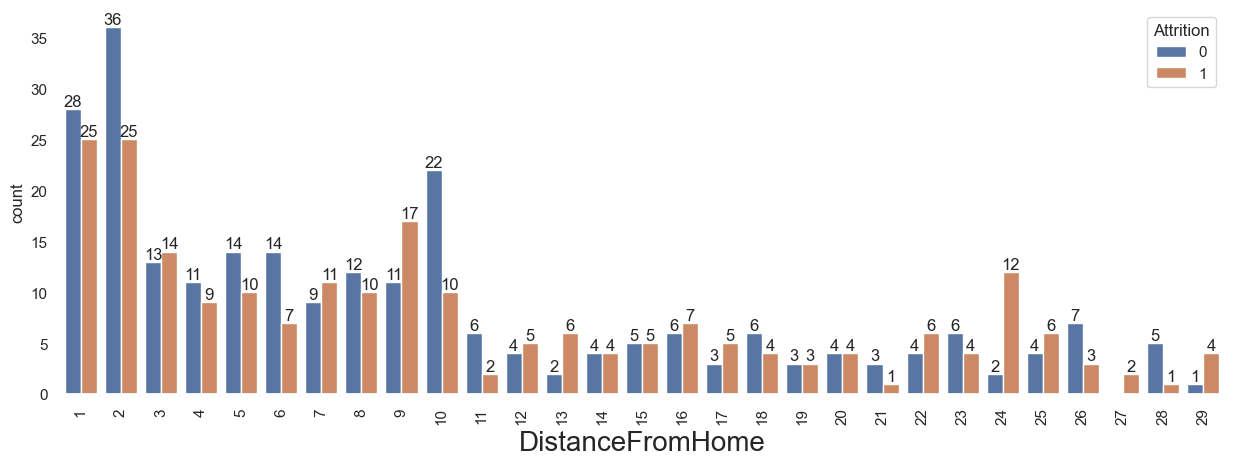

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


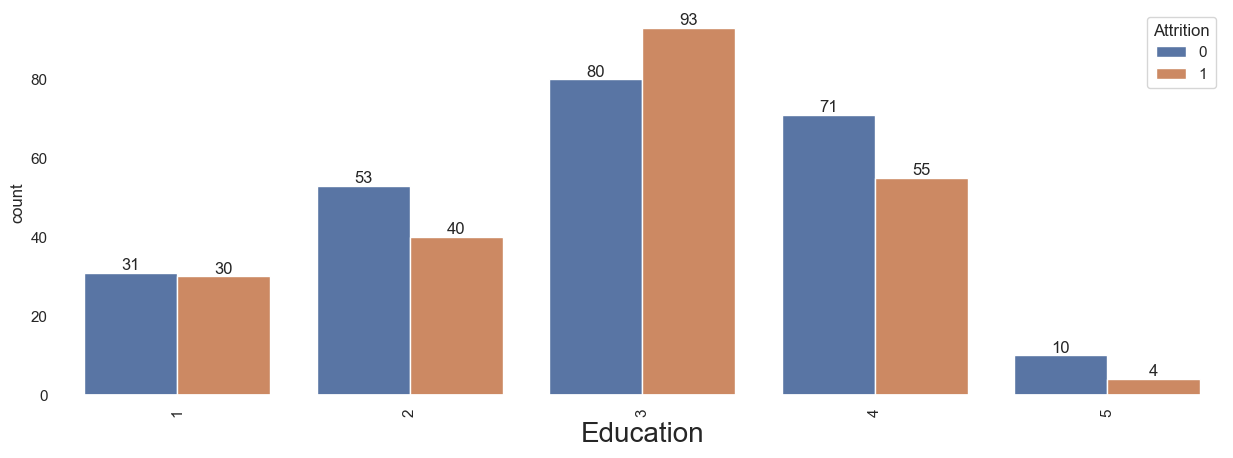

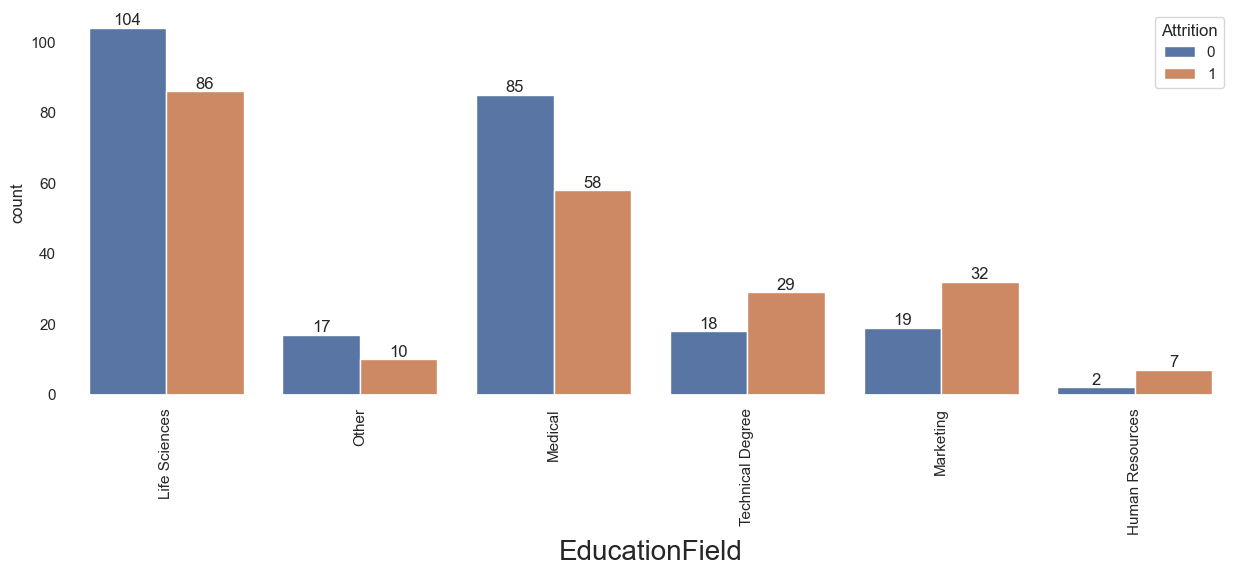

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


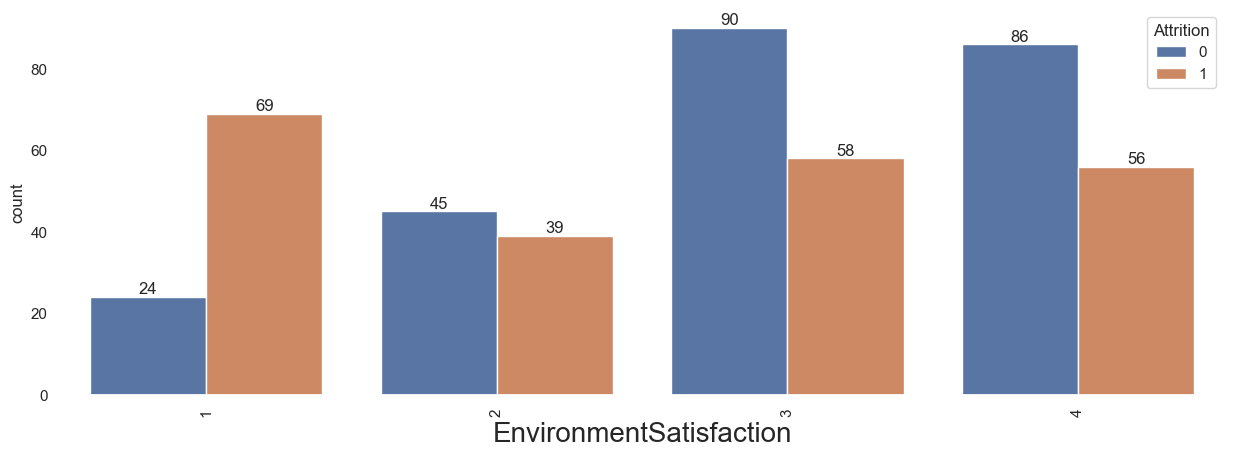

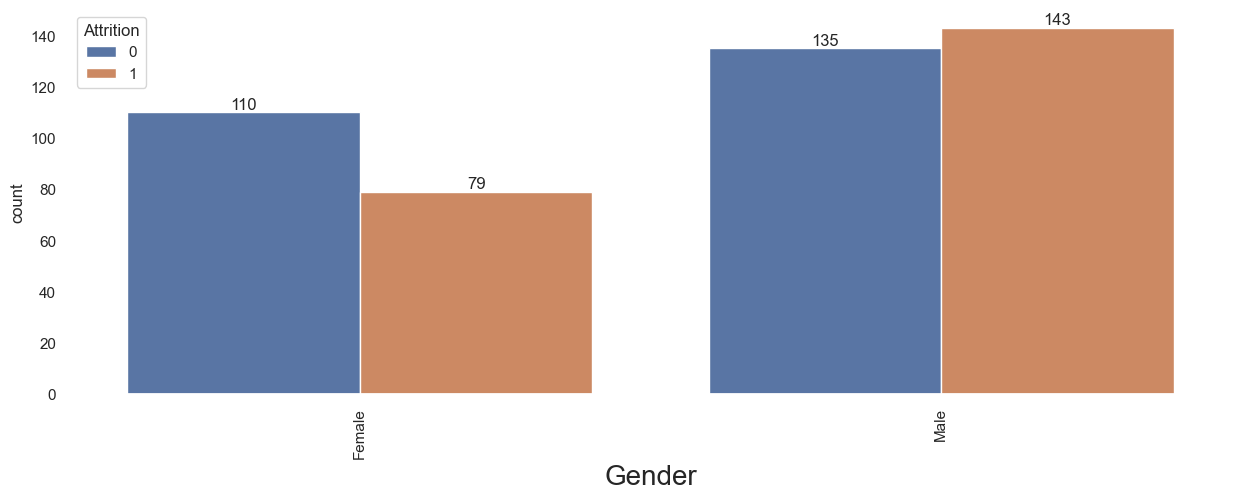

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


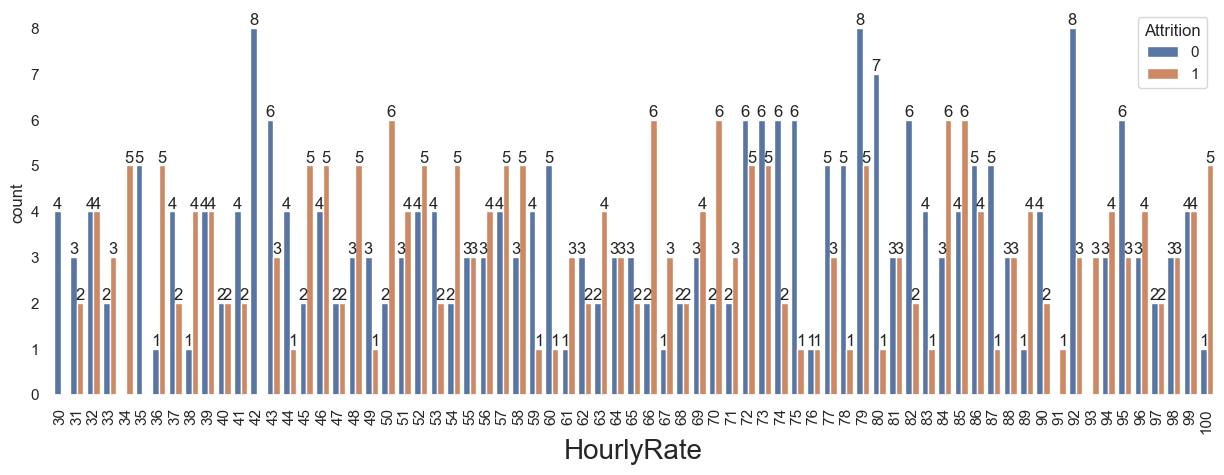

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


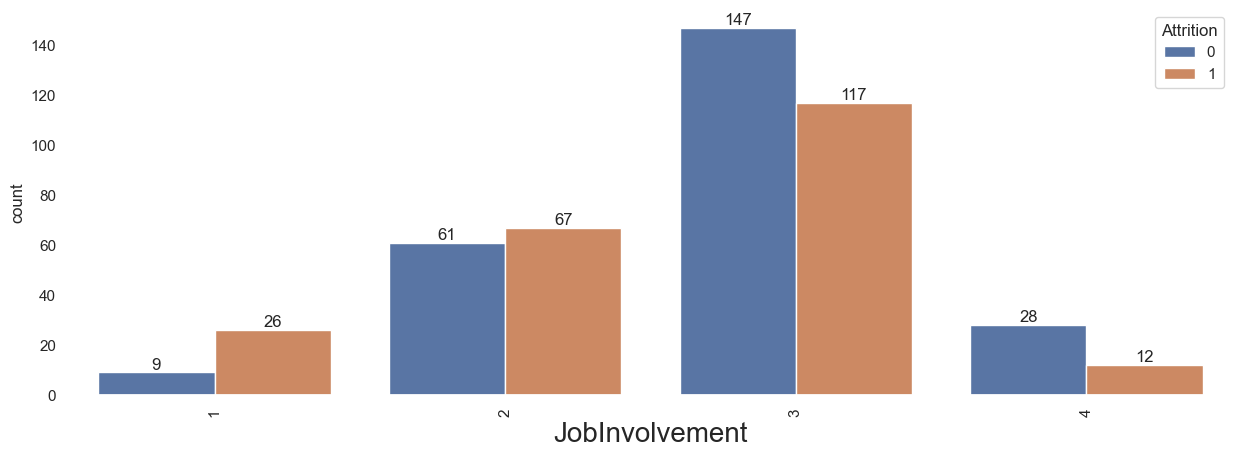

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


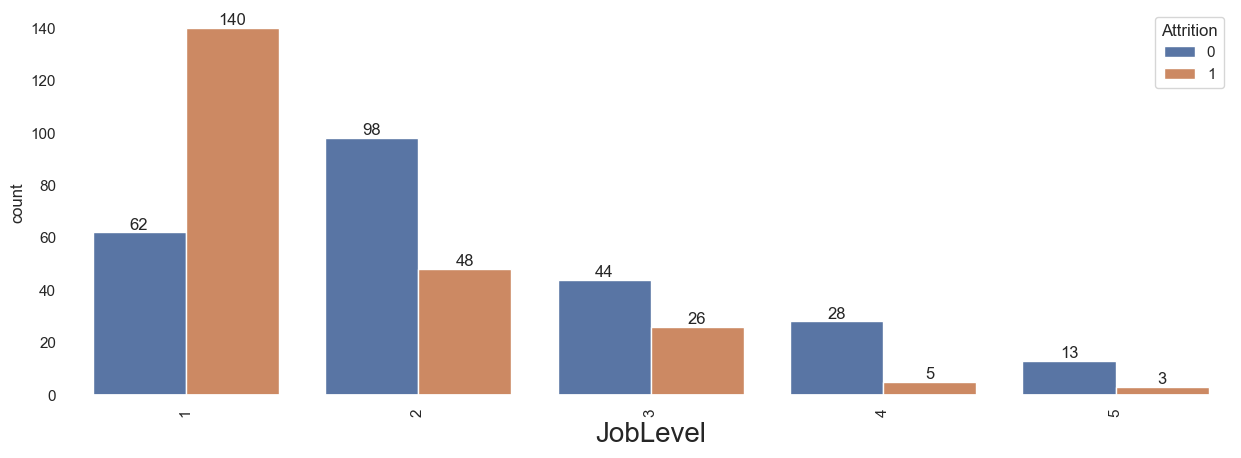

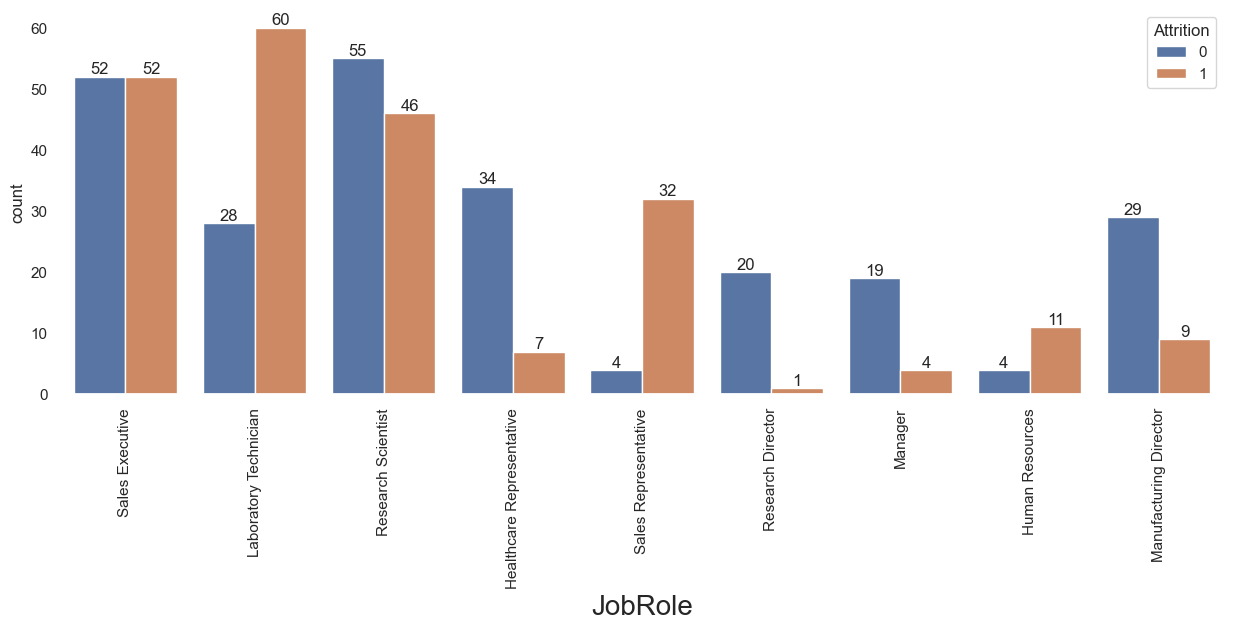

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


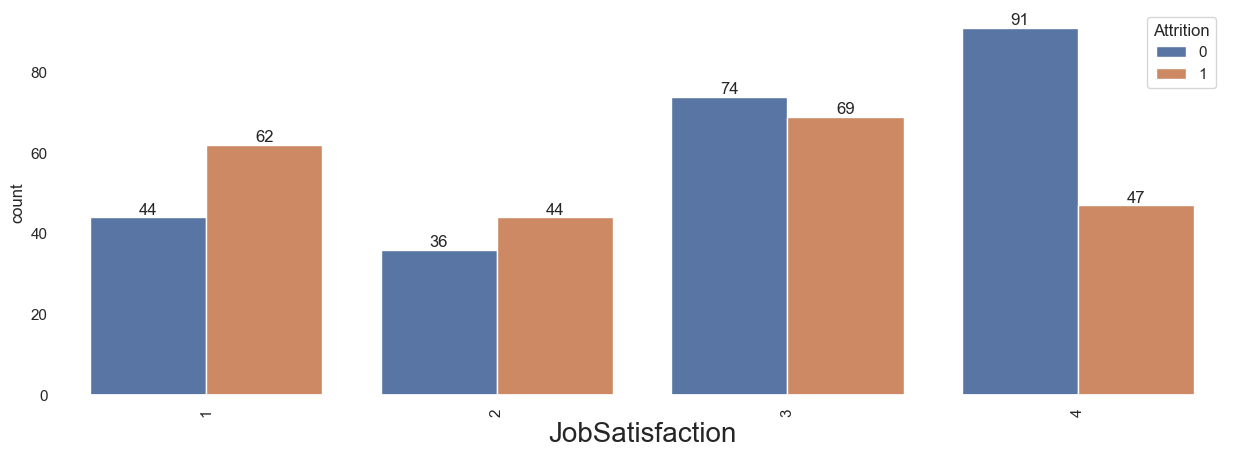

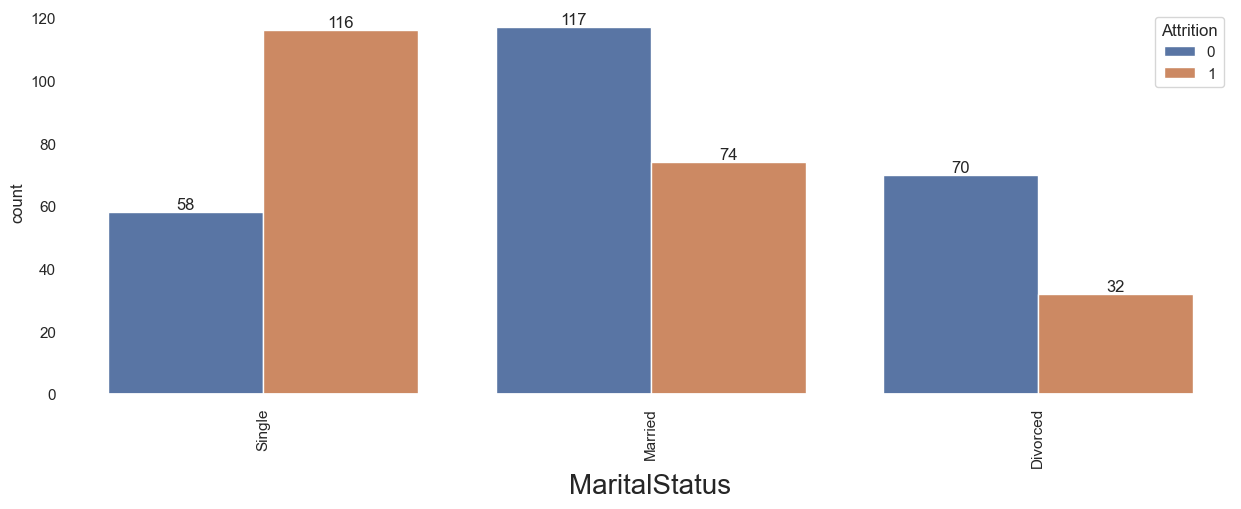

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


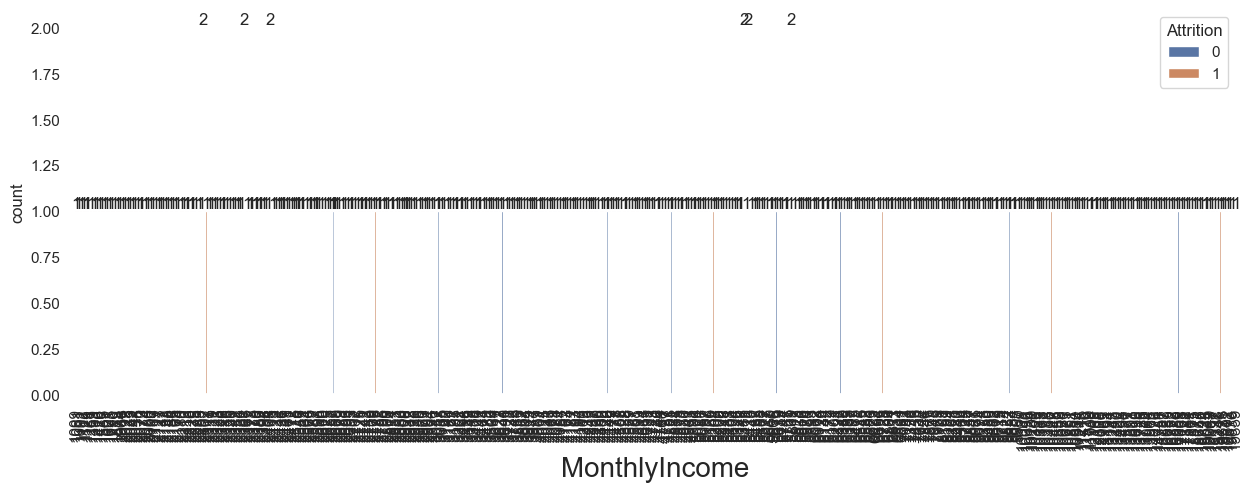

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


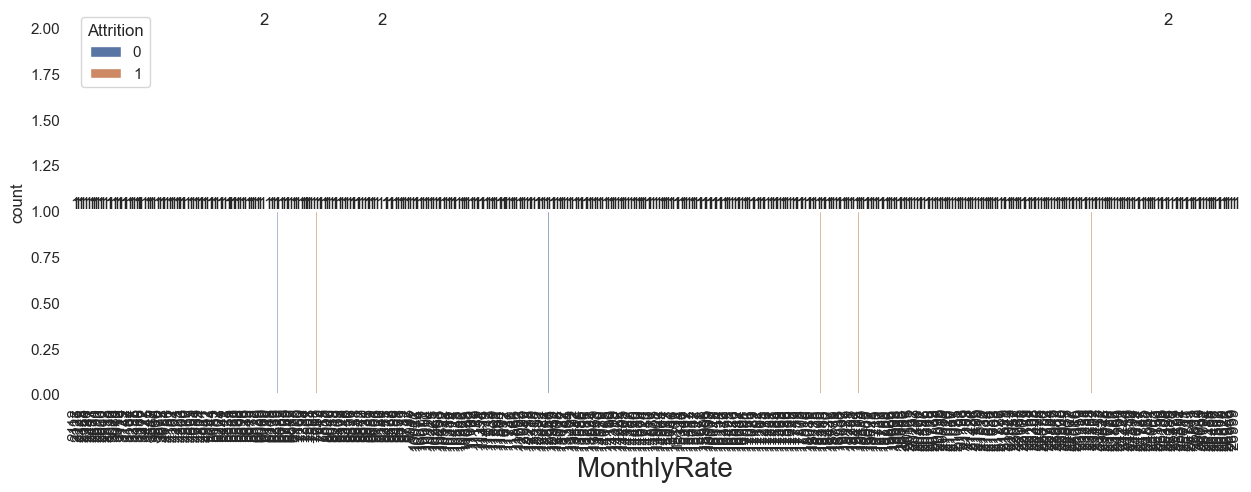

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


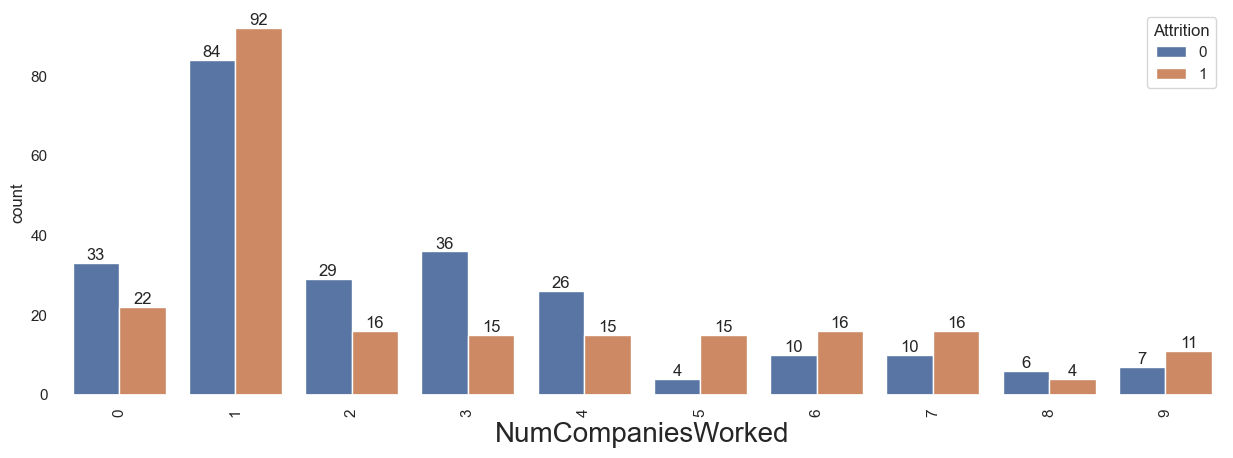

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


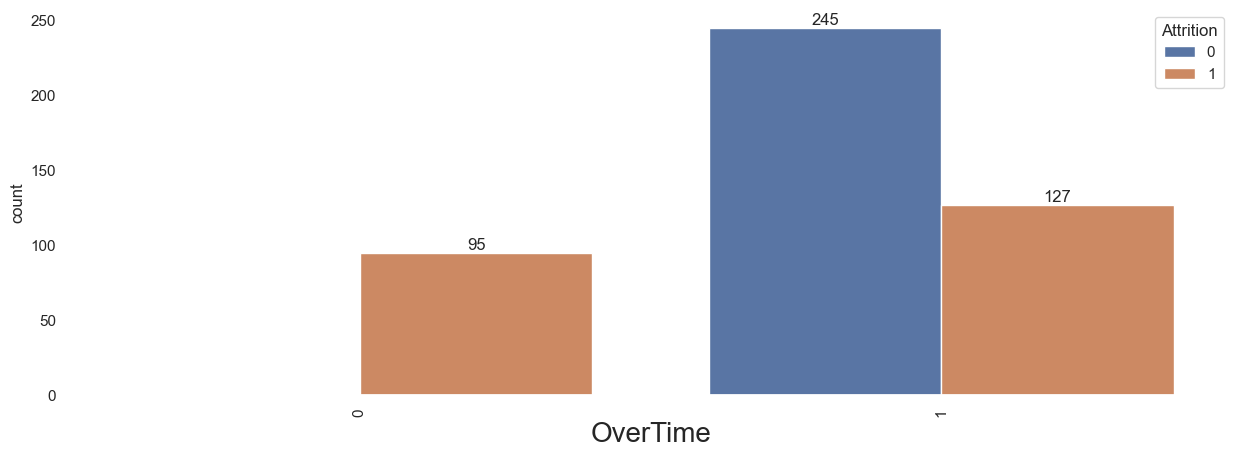

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


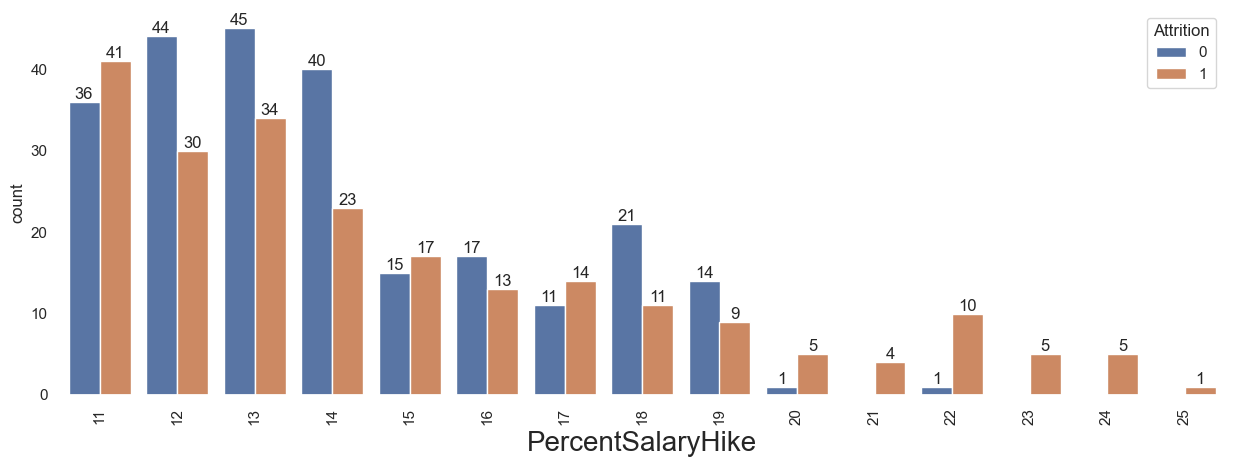

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


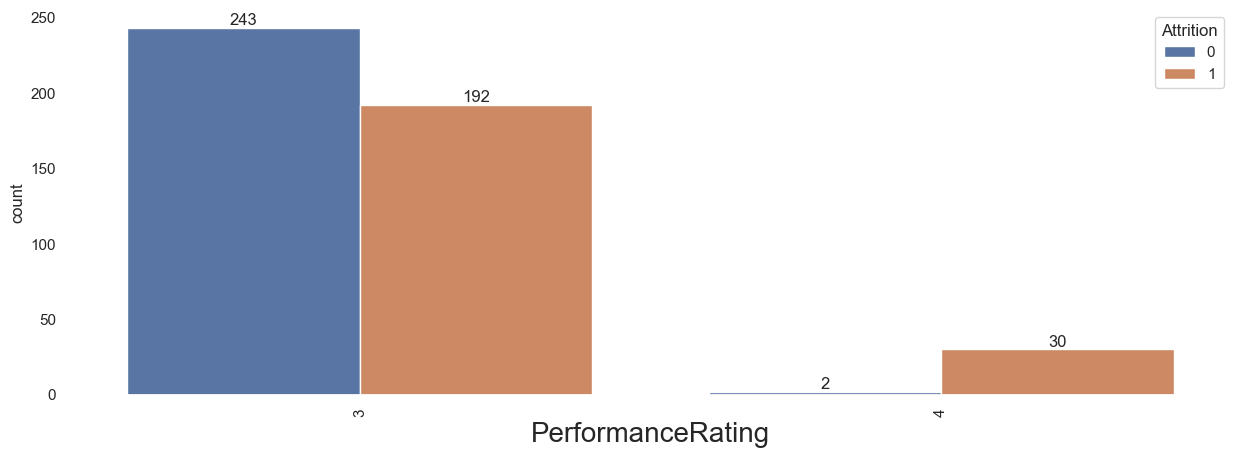

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


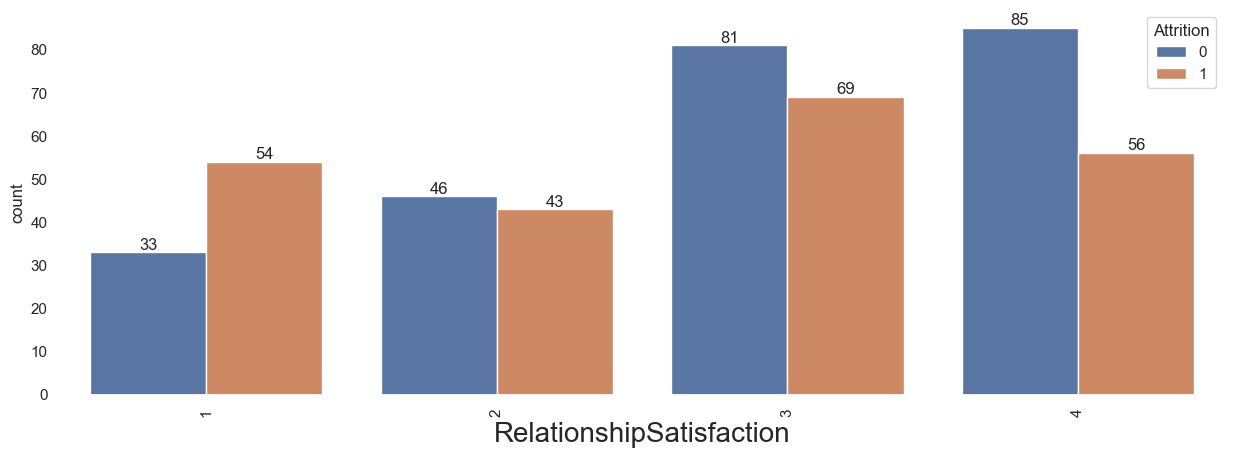

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


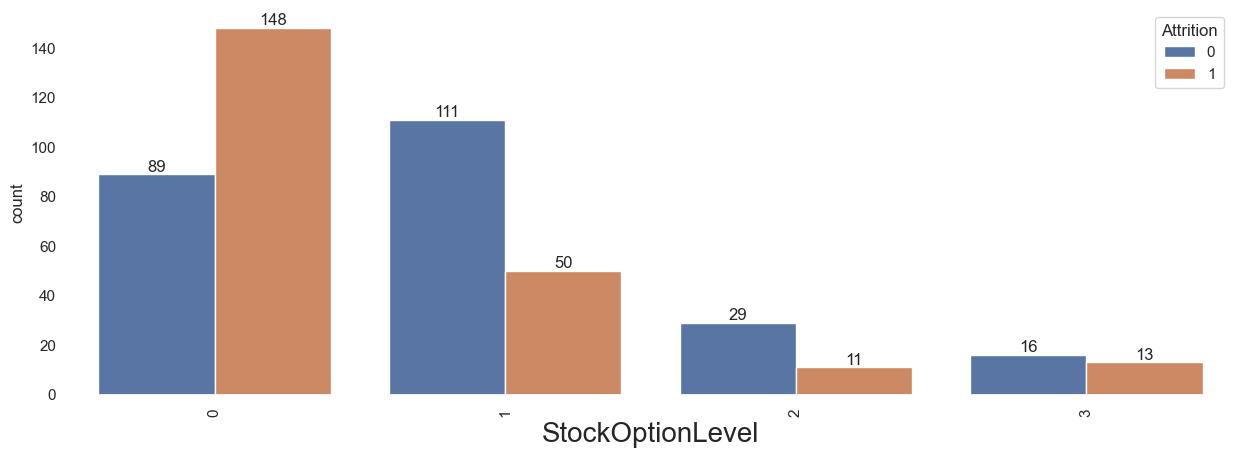

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


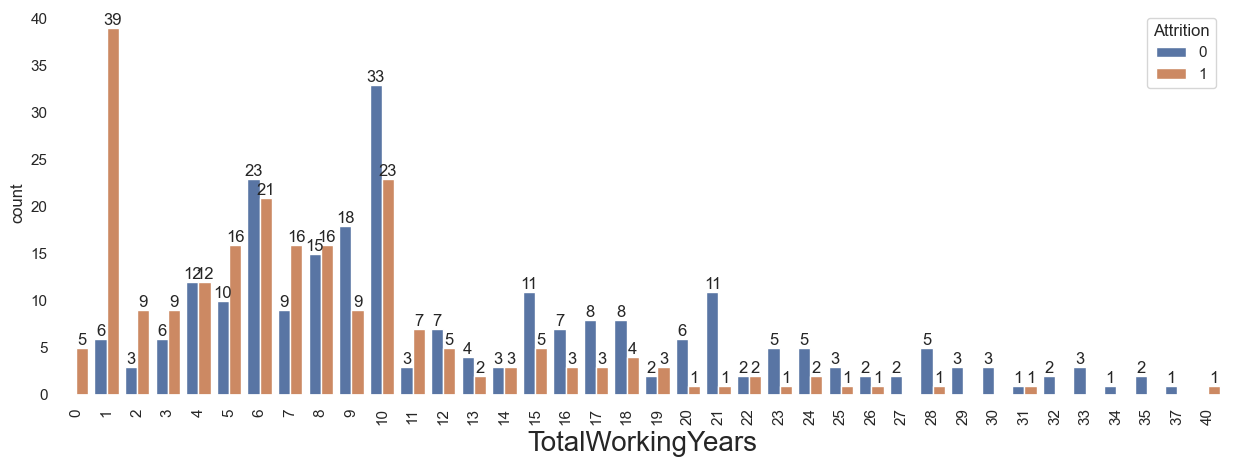

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


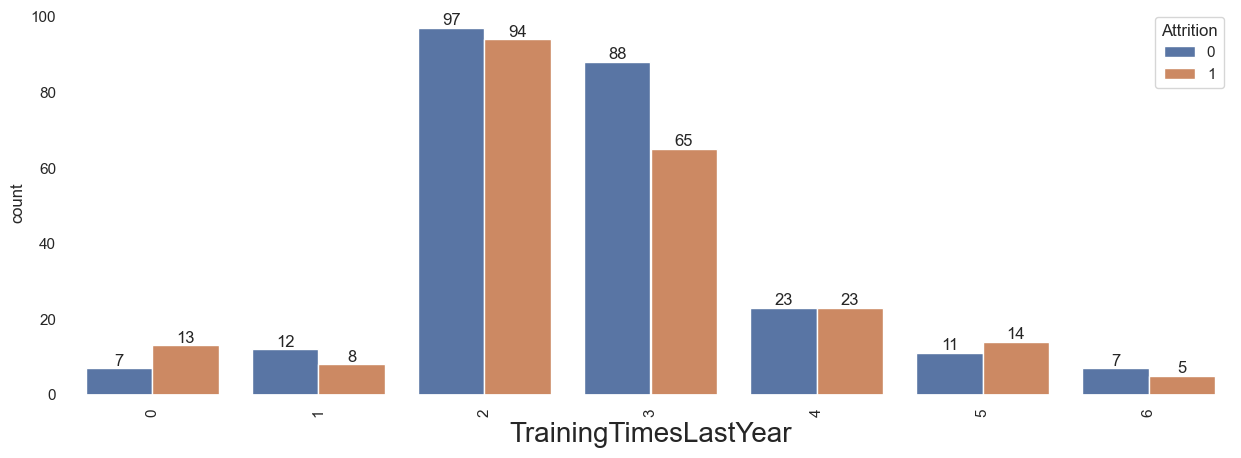

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


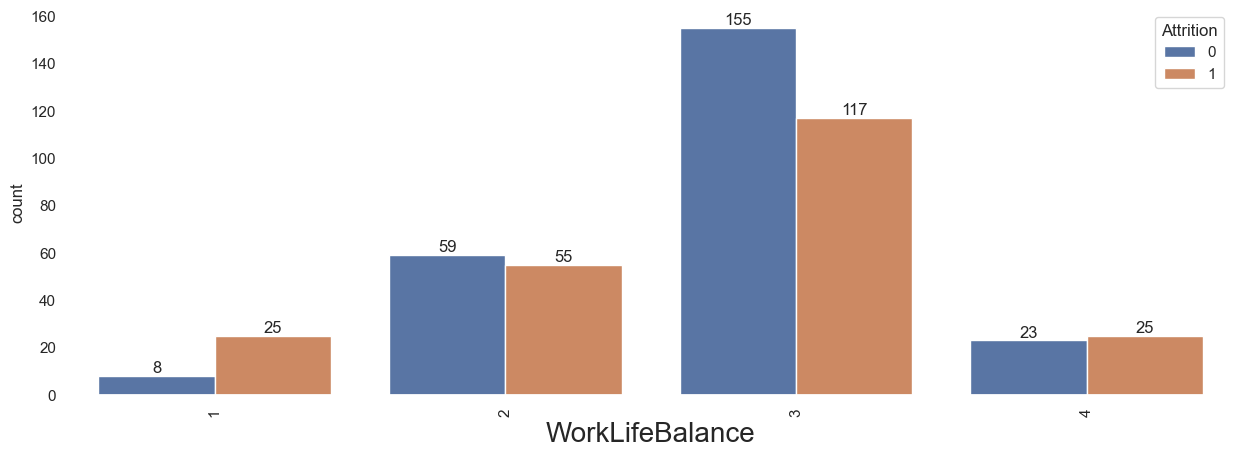

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


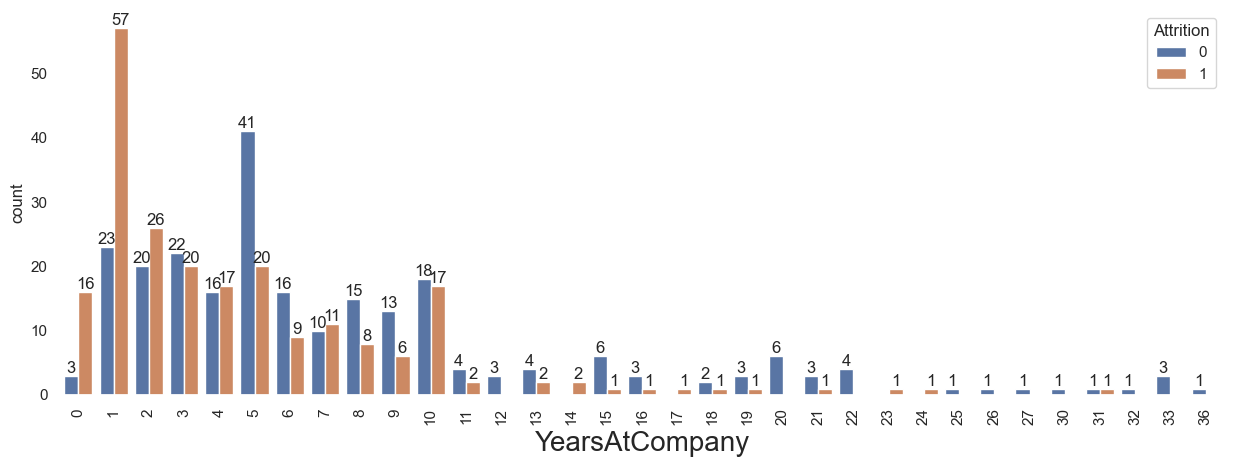

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


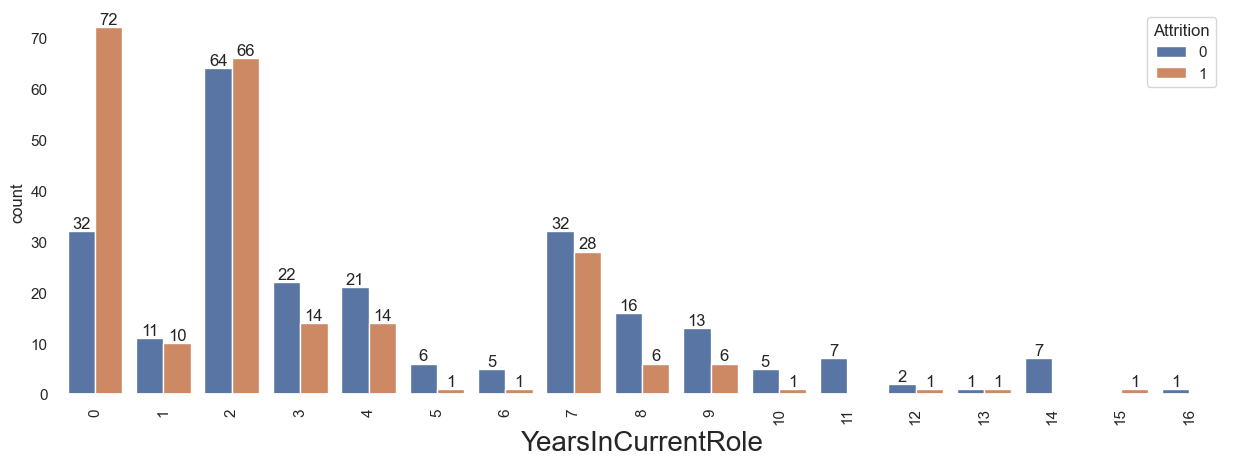

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


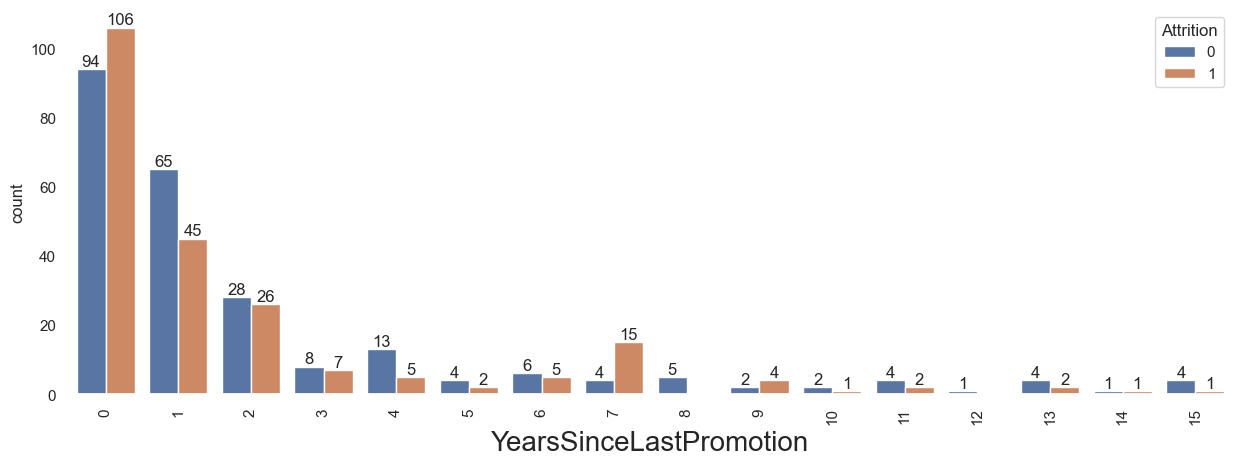

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


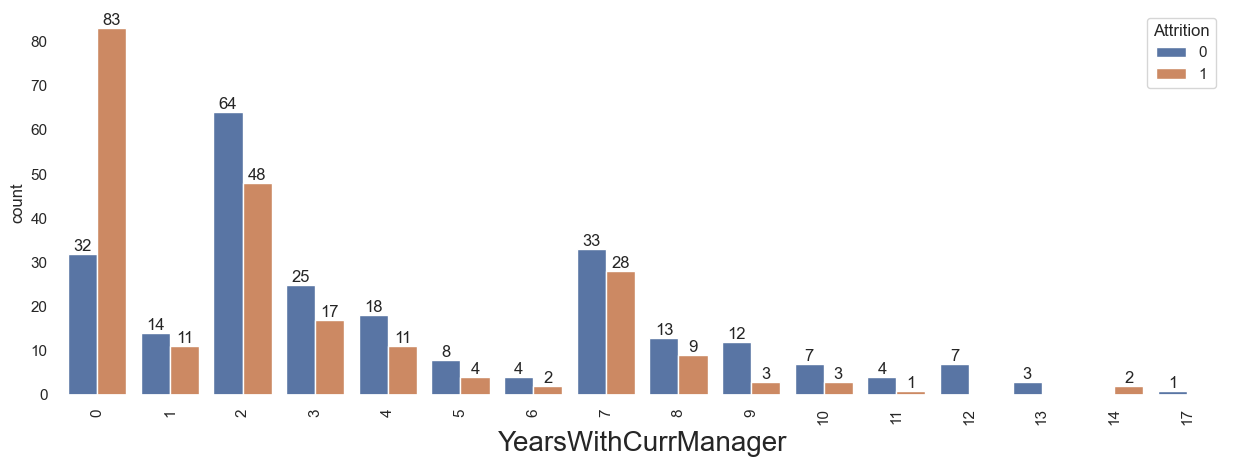

[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[clusteval] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


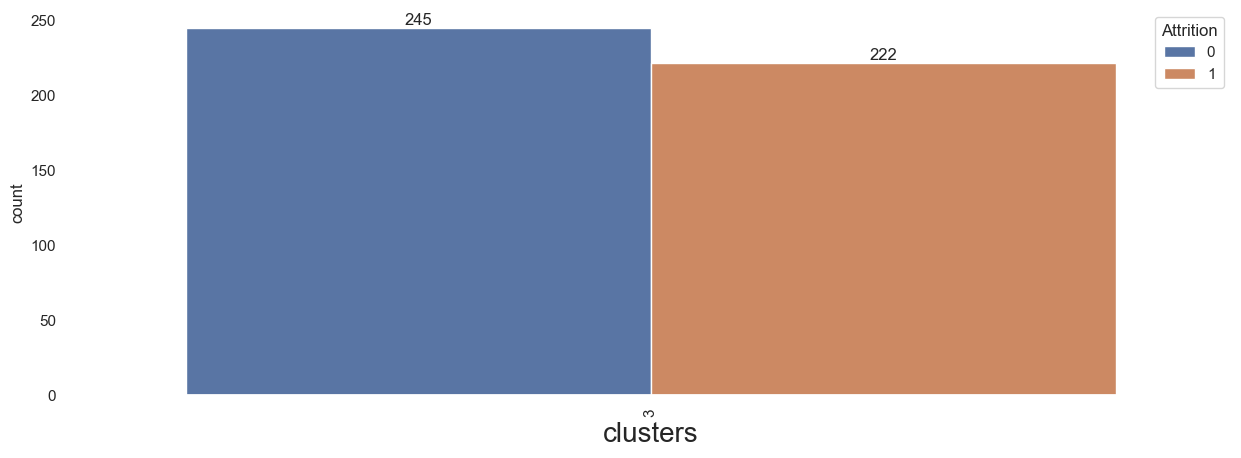

In [84]:
for column in cluster_3: 
    plt.figure(figsize=(15,5))
    
    ax = sns.countplot(x=cluster_3[column], data=cluster_3,hue='Attrition')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()